# Клепиков Никита
Вариант 7

Группа 6132

In [177]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import time

In [178]:
class gaussNB():
    def fit(self, X, y):
        self.means = X.groupby(y).apply(np.mean)
        self.stds = X.groupby(y).apply(np.std)
        self.probs = X.groupby(y).apply(lambda x: len(x)) / X.shape[0]
        self.classes = np.unique(y)
        
    def predict(self, X):
        y_pred = []
        for elem in range(X.shape[0]):
            p = {}
    
            for cl in self.classes:
                p[cl] = self.probs.iloc[cl]
                for index, param in enumerate(X.iloc[elem]):
                    p[cl] *= norm.pdf(param, self.means.iloc[cl, index], self.stds.iloc[cl, index])
            y_pred.append(pd.Series(p).values.argmax())
         
        return y_pred

In [179]:
def generate_data(M=775, shift=2, L=0.705, R=0.712, pos_shift=10):
    noise = np.random.randn(M, 2) 
    
    cloud_1 = noise + np.array([shift, shift * 2])
    cloud_2 = noise + np.array([shift, -shift])
    cloud_3 = noise + np.array([-shift, shift*2])
    cloud_4 = noise + np.array([-shift, -shift])
    cloud_5 = noise + np.array([shift*2, shift*1.25])
    cloud_6 = noise + np.array([shift*2, 0])
    cloud_7 = noise + np.array([-shift*2, shift*0.5])
    
    XY = np.vstack([cloud_1, cloud_2, cloud_3, cloud_4, cloud_5, cloud_6, cloud_7])
    XY.shape
    
    annotation_1 = [0]*M
    annotation_2 = [1]*M
    annotation_3 = [2]*M
    annotation_4 = [3]*M
    annotation_5 = [4]*M
    annotation_6 = [5]*M
    annotation_7 = [6]*M
    
    annotations = annotation_1 + annotation_2 + annotation_3 + annotation_4 + annotation_5 + annotation_6 + annotation_7
    
    data, labels = shuffle(XY, annotations)
    data = pd.DataFrame(data)
    
    return train_test_split(data, labels, test_size=0.5)

In [180]:
def make_explore(model, X_train, X_test, y_train, y_test):
    # model's fit:
    start_time_fit = time.time()
    model.fit(X_train, y_train)
    end_time_fit = time.time()
    time_fit = float(str("%s" % (end_time_fit - start_time_fit)))
    
    #model's pred:
    start_time_pred = time.time()
    y_pred = model.predict(X_test)
    end_time_pred = time.time()
    time_pred = float(str("%s" % (end_time_pred - start_time_pred)))

    acc_score = accuracy_score(y_pred, y_test)*100
    
    temp_scores_data= pd.DataFrame({'accuracy_score': [acc_score], 
                                          'time_fit':[time_fit],
                                         'time_pred':[time_pred]})
    
    return temp_scores_data

In [181]:
scores_data_GNB, scores_data_GaussianNB, scores_data_MultinomialNB, scores_data_ComplementNB, scores_data_BernoulliNB = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
evaluation_count = 15
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = generate_data()

scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

for i in range(evaluation_count):
    
    
    
    model_GNB, model_GaussianNB, model_MultinomialNB, model_ComplementNB, model_BernoulliNB =  gaussNB(), GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()
    scores_data_GNB = scores_data_GNB.append(make_explore(model_GNB, 
                                                          X_train, 
                                                          X_test, 
                                                          y_train, 
                                                          y_test))
    scores_data_GaussianNB = scores_data_GaussianNB.append(make_explore(model_GaussianNB, 
                                                                        X_train, 
                                                                        X_test, 
                                                                        y_train, 
                                                                        y_test))
    scores_data_MultinomialNB = scores_data_MultinomialNB.append(make_explore(model_MultinomialNB, 
                                                                              X_train_scaler, 
                                                                              X_test_scaler, 
                                                                              y_train, 
                                                                              y_test))
    scores_data_ComplementNB = scores_data_ComplementNB.append(make_explore(model_ComplementNB, 
                                                                            X_train_scaler, 
                                                                            X_test_scaler, 
                                                                            y_train, 
                                                                            y_test))
    scores_data_BernoulliNB = scores_data_BernoulliNB.append(make_explore(model_BernoulliNB, 
                                                                          X_train, 
                                                                          X_test, 
                                                                          y_train, 
                                                                          y_test))

In [182]:
scores_data_GNB = scores_data_GNB.set_index([pd.Index(range(15))])
scores_data_GaussianNB = scores_data_GaussianNB.set_index([pd.Index(range(15))])
scores_data_MultinomialNB = scores_data_MultinomialNB.set_index([pd.Index(range(15))])
scores_data_ComplementNB = scores_data_ComplementNB.set_index([pd.Index(range(15))])
scores_data_BernoulliNB = scores_data_BernoulliNB.set_index([pd.Index(range(15))])

# 1. График производительности

In [183]:
df = pd.DataFrame(columns=['model_name', 'accuracy_score', 'time_fit', 'time_pred', 'quality'])

Качество производительности будет оцениваться как СКО / матожидание:

In [184]:
quality = []
quality.append(scores_data_GNB['time_pred'].std() / scores_data_GNB['time_pred'].mean())
quality.append(scores_data_GaussianNB['time_pred'].std() / scores_data_GaussianNB['time_pred'].mean())
quality.append(scores_data_MultinomialNB['time_pred'].std() / scores_data_MultinomialNB['time_pred'].mean())
quality.append(scores_data_ComplementNB['time_pred'].std() / scores_data_ComplementNB['time_pred'].mean())
quality.append(scores_data_BernoulliNB['time_pred'].std() / scores_data_BernoulliNB['time_pred'].mean())

In [185]:
df = df.append({'model_name':'My_Gauss',
                "accuracy_score":scores_data_GNB['accuracy_score'].mean(),
          "time_fit":scores_data_GNB['time_fit'].mean(),
            "time_pred":scores_data_GNB['time_pred'].mean(), 'quality': quality[0]}, ignore_index=True)
df = df.append({'model_name':'GaussianNB', 
                "accuracy_score":scores_data_GaussianNB['accuracy_score'].mean(),
          "time_fit":scores_data_GaussianNB['time_fit'].mean(),
            "time_pred":scores_data_GaussianNB['time_pred'].mean(), 'quality': quality[1]}, ignore_index=True)
df = df.append({'model_name':'MultinomialNB', 
                "accuracy_score":scores_data_MultinomialNB['accuracy_score'].mean(),
          "time_fit":scores_data_MultinomialNB['time_fit'].mean(),
            "time_pred":scores_data_MultinomialNB['time_pred'].mean(), 'quality': quality[2]}, ignore_index=True)
df = df.append({'model_name':'ComplementNB',
                "accuracy_score":scores_data_ComplementNB['accuracy_score'].mean(),
          "time_fit":scores_data_ComplementNB['time_fit'].mean(),
            "time_pred":scores_data_ComplementNB['time_pred'].mean(), 'quality': quality[3]}, ignore_index=True)
df = df.append({'model_name':'BernoulliNB',
                "accuracy_score":scores_data_BernoulliNB['accuracy_score'].mean(),
          "time_fit":scores_data_BernoulliNB['time_fit'].mean(),
            "time_pred":scores_data_BernoulliNB['time_pred'].mean(), 'quality': quality[4]}, ignore_index=True)

In [186]:
df = df.set_index('model_name')

In [187]:
df

,accuracy_score,time_fit,time_pred,quality
model_name,,,,
My_Gauss,86.841135,0.018121,11.878571,0.037595
GaussianNB,86.841135,0.002945,0.002076,0.217550
MultinomialNB,33.800221,0.001896,0.000066,3.872983
ComplementNB,28.824180,0.001640,0.000039,3.664401
BernoulliNB,54.478437,0.002675,0.001552,0.305864


<AxesSubplot:xlabel='model_name'>

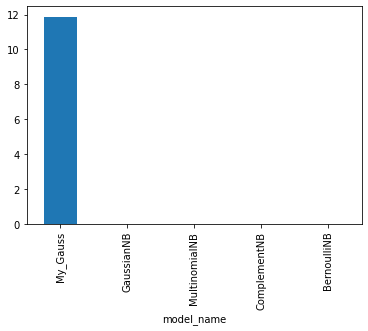

In [188]:
df['time_pred'].plot.bar()

# 2. Стабильная производительность:

In [189]:
df = df.sort_values(by=['quality'])
print("Наилучшая стабильная производительность у классификатора: {}".format(df.index[0]))

Наилучшая стабильная производительность у классификатора: My_Gauss


# 3. Матрицы ошибок:

In [190]:
X_train, X_test, y_train, y_test = generate_data()

model_GNB, model_GaussianNB, model_MultinomialNB, model_ComplementNB, model_BernoulliNB =  gaussNB(), GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()

<AxesSubplot:>

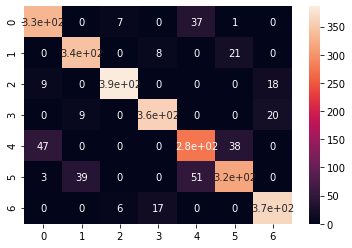

In [191]:
model_GNB.fit(X_train, y_train)
y_pred = model_GNB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

<AxesSubplot:>

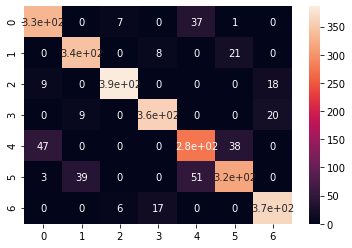

In [192]:
model_GaussianNB.fit(X_train, y_train)
y_pred = model_GaussianNB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

<AxesSubplot:>

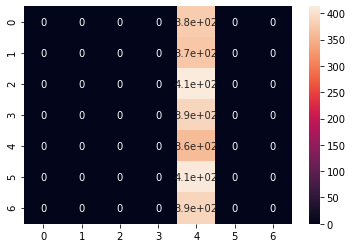

In [193]:
model_MultinomialNB.fit(X_train_scaler, y_train)
y_pred = model_MultinomialNB.predict(X_test_scaler)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

<AxesSubplot:>

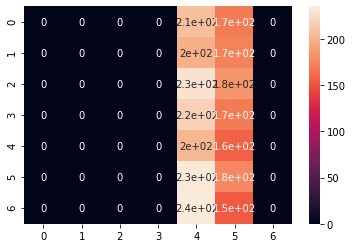

In [194]:
model_ComplementNB.fit(X_train_scaler, y_train)
y_pred = model_ComplementNB.predict(X_test_scaler)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

<AxesSubplot:>

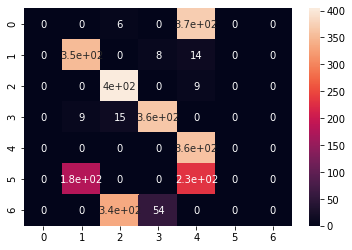

In [195]:
model_BernoulliNB.fit(X_train, y_train)
y_pred = model_BernoulliNB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

# 4 Наиболее качественный классификатор:

In [196]:
df = df.sort_values(by=['accuracy_score'])
print('Наилучшую точность обеспечивает классификатор: {}'.format(df.index[4]))

Наилучшую точность обеспечивает классификатор: GaussianNB
